In [13]:
!ls

2017 NEISS Data Highlights.pdf        NEISS_EXERCISE.ipynb
2018-NEISS-CPSC-only-CodingManual.pdf neiss2017.tsv
2018ComparabilityTable.pdf            neiss_fmt.txt


In [14]:
!head -n 5 neiss2017.tsv

In [15]:
import pandas as pd
import requests

%matplotlib inline

In [16]:
df = pd.read_tsv('neiss2017.tsv')
df

#\t means the tab character
#\n means a new line
# sep = means this is what separated our stuff

AttributeError: module 'pandas' has no attribute 'read_tsv'

In [17]:
df = pd.read_csv('neiss2017.tsv', sep='\t')

#unicode or UTF - means we will have all the languages inside to the characters not only specific continent
#unicode decode error - the person only saves it in the specific country not aiming for the whole world
#kalau data terkait america guess saja kodenya latin1
#encoding means this is the encoding that i want to use
#since UTF OR UNICODE/UTF-8 doesnt work we will try latin-1

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc6 in position 54: invalid continuation byte

In [18]:
df = pd.read_csv("neiss2017.tsv", sep='\t', encoding='latin-1', na_values=[0, "UNKNOWN"])
df.head(2)

#kalau na_values =[0] artinya


/Users/dronejournalismlab/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1.0,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,1.0,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


In [19]:
df.shape

(386907, 19)

In [20]:
df.tail()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
386902,180309762,12/30/2017,2,2.0,1.0,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1931.0,NaN,2YR F INGESTED 9 OF MOTHERS GLIPIZIDE PILLS;DX...,NaN,C,20.0,4.757
386903,180309763,12/31/2017,212,2.0,2.0,NaN,92.0,50.0,NaN,4.0,1.0,NaN,4076.0,NaN,"12MO F PT LYING IN BED, THERE WAS A DRIVE-BY S...",UGH WALL AND HIT PT IN BED; DX AMPUTATED THUMB,C,20.0,4.757
386904,180309764,12/31/2017,218,1.0,1.0,NaN,81.0,57.0,NaN,4.0,1.0,NaN,1395.0,NaN,18MO M SLIPPED ON TOY;DX FEMUR FX,NaN,C,20.0,4.757
386905,180309765,12/31/2017,202,1.0,1.0,NaN,75.0,57.0,NaN,4.0,1.0,NaN,1842.0,NaN,2MO M DAD FELL ON STAIRS WHILE HOLDING BABY;DX...,NaN,C,20.0,4.757
386906,180309766,12/31/2017,2,2.0,1.0,NaN,85.0,68.0,NaN,4.0,1.0,NaN,1931.0,NaN,2YR F GOT INTO DAD'S ***;DX ACCIDENTAL DRUG IN...,NaN,C,20.0,4.757


In [21]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                 float64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [22]:
df.Age


0          21
1          71
2          16
3          55
4          86
5          58
6          21
7          54
8          21
9          35
10         62
11         22
12         58
13         69
14         74
15         31
16         11
17         55
18         83
19         38
20         59
21         34
22         42
23         96
24         83
25         31
26         79
27          3
28          2
29         82
         ... 
386877     45
386878     48
386879     17
386880     29
386881     34
386882     51
386883     22
386884     11
386885     32
386886     21
386887     29
386888     11
386889      8
386890    212
386891      2
386892    218
386893      5
386894      2
386895      5
386896      3
386897     12
386898     10
386899      4
386900      5
386901      3
386902      2
386903    212
386904    218
386905    202
386906      2
Name: Age, Length: 386907, dtype: object

In [23]:
df.Sex.value_counts()


1.0    208695
2.0    178203
8.0         1
Name: Sex, dtype: int64

#1-male
#2-female
#0-Not recorded
#8????

In [24]:
df['Sex'] = df.Sex.replace({1:'Male', 2:'Female', 0:'Not recorded'})
#you cannot just say replace the data
#we are gonna cleaning up the sex column and get back to this again
#and store it!!
#so put df['Sex']

In [25]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [26]:
df.Sex.value_counts()

Male      208695
Female    178203
8.0            1
Name: Sex, dtype: int64

In [27]:
#just show me the row where sex= 8
df[df.Sex ==8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.head(3)
#oh weird, we are missing a lot of information in the table!

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641


In [29]:
df.Treatment_Date

0         01/01/2017
1         01/01/2017
2         01/01/2017
3         01/01/2017
4         01/01/2017
5         01/01/2017
6         01/01/2017
7         01/01/2017
8         01/01/2017
9         01/01/2017
10        01/01/2017
11        01/01/2017
12        01/01/2017
13        01/01/2017
14        01/01/2017
15        01/01/2017
16        01/01/2017
17        01/01/2017
18        01/01/2017
19        01/01/2017
20        01/01/2017
21        01/01/2017
22        01/01/2017
23        01/01/2017
24        01/01/2017
25        01/01/2017
26        01/01/2017
27        01/01/2017
28        01/01/2017
29        01/01/2017
             ...    
386877    12/14/2017
386878    12/14/2017
386879    12/14/2017
386880    12/14/2017
386881    12/14/2017
386882    12/14/2017
386883    12/14/2017
386884    12/14/2017
386885    12/14/2017
386886    12/14/2017
386887    12/14/2017
386888    12/17/2017
386889    12/17/2017
386890    12/18/2017
386891    12/19/2017
386892    12/19/2017
386893    12/

In [30]:
#.isna() or .isnull() is the same
df.Treatment_Date.isna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
386877    False
386878    False
386879    False
386880    False
386881    False
386882    False
386883    False
386884    False
386885    False
386886    False
386887    False
386888    False
386889    False
386890    False
386891    False
386892    False
386893    False
386894    False
386895    False
386896    False
386897    False
386898    False
386899    False
386900    False
386901    False
386902    False
386903    False
386904    False
386905    False
386906    False
Name: Treatment_Date, Le

In [31]:
df[df.Treatment_Date.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.Treatment_Date.isna().sum()

1

In [33]:
#adds up all of the Trues as 1, False as 0

In [34]:
(df.Sex =='Male').sum()

208695

In [35]:
#remove all rows that are missing data
df = df.dropna(subset=['Treatment_Date','Age'])
df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58,Male,1.0,NaN,31.0,53.0,NaN,1.0,1.0,NaN,649.0,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FE...",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641
6,170102021,01/01/2017,21,Male,1.0,NaN,79.0,64.0,NaN,1.0,1.0,NaN,4076.0,NaN,21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWIS...,", LOWER BACK. (ACUTE EXACERBATION OF LOW BACK ...",S,72.0,77.6641
7,170102025,01/01/2017,54,Male,1.0,NaN,75.0,62.0,NaN,2.0,5.0,NaN,1807.0,NaN,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHER...,N TO THE FLOOR. SUBDURAL HEMATOMA.,S,72.0,77.6641
8,170102026,01/01/2017,21,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN...,AND,S,72.0,77.6641
9,170102907,01/01/2017,35,Female,NaN,NaN,79.0,64.0,NaN,1.0,1.0,NaN,1807.0,NaN,35YOF STR LWR BACK GETTING UP FROM FLOOR,NaN,M,14.0,87.0904


In [36]:
df[df.Treatment_Date.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [37]:
df['Age'] = df.Age.astype(float)
df

#pandas gak suka ada column dengan integer dengan missing data. kecuali datanya jenisnya float, integer ga bisa missing data. 

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,1.0,NaN,649.0,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FE...",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641
6,170102021,01/01/2017,21.0,Male,1.0,NaN,79.0,64.0,NaN,1.0,1.0,NaN,4076.0,NaN,21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWIS...,", LOWER BACK. (ACUTE EXACERBATION OF LOW BACK ...",S,72.0,77.6641
7,170102025,01/01/2017,54.0,Male,1.0,NaN,75.0,62.0,NaN,2.0,5.0,NaN,1807.0,NaN,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHER...,N TO THE FLOOR. SUBDURAL HEMATOMA.,S,72.0,77.6641
8,170102026,01/01/2017,21.0,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN...,AND,S,72.0,77.6641
9,170102907,01/01/2017,35.0,Female,NaN,NaN,79.0,64.0,NaN,1.0,1.0,NaN,1807.0,NaN,35YOF STR LWR BACK GETTING UP FROM FLOOR,NaN,M,14.0,87.0904


In [38]:
df.Age.astype(int).median()

29.0

In [39]:
df.Age.astype(int).min() 
#setiap lakukan analisis selalu liat code manual book, karena 0 bukan integer tapi code untuk not recorded


2

In [40]:
df.Age.describe()

count    386886.000000
mean         44.370753
std          49.561221
min           2.000000
25%          12.000000
50%          29.000000
75%          60.000000
max         223.000000
Name: Age, dtype: float64

***table histogram shows distribution***

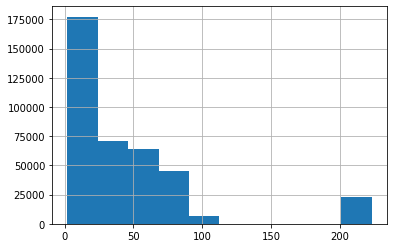

In [41]:
df.Age.hist()

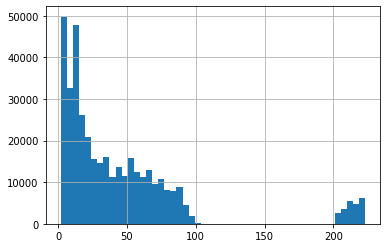

In [42]:
df.Age.hist(bins=50)

In [43]:
df.Age >= 200

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
386877    False
386878    False
386879    False
386880    False
386881    False
386882    False
386883    False
386884    False
386885    False
386886    False
386887    False
386888    False
386889    False
386890     True
386891    False
386892     True
386893    False
386894    False
386895    False
386896    False
386897    False
386898    False
386899    False
386900    False
386901    False
386902    False
386903     True
386904     True
386905     True
386906    False
Name: Age, Length: 38688

In [44]:
(df.Age >= 200).sum()

22818

In [45]:
df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,1.0,NaN,649.0,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FE...",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641
6,170102021,01/01/2017,21.0,Male,1.0,NaN,79.0,64.0,NaN,1.0,1.0,NaN,4076.0,NaN,21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWIS...,", LOWER BACK. (ACUTE EXACERBATION OF LOW BACK ...",S,72.0,77.6641
7,170102025,01/01/2017,54.0,Male,1.0,NaN,75.0,62.0,NaN,2.0,5.0,NaN,1807.0,NaN,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHER...,N TO THE FLOOR. SUBDURAL HEMATOMA.,S,72.0,77.6641
8,170102026,01/01/2017,21.0,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN...,AND,S,72.0,77.6641
9,170102907,01/01/2017,35.0,Female,NaN,NaN,79.0,64.0,NaN,1.0,1.0,NaN,1807.0,NaN,35YOF STR LWR BACK GETTING UP FROM FLOOR,NaN,M,14.0,87.0904


In [46]:
df[df.Age < 200]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641
5,170102019,01/01/2017,58.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,1.0,NaN,649.0,1807.0,"58 YOM WENT TO BATHROOM; LOST HIS BALANCE, FE...",K ON TOILET. CONTUSION OF UPPER BACK.,S,72.0,77.6641
6,170102021,01/01/2017,21.0,Male,1.0,NaN,79.0,64.0,NaN,1.0,1.0,NaN,4076.0,NaN,21 YOM TURNED WRONG AS HE GOT OUT OF BED. TWIS...,", LOWER BACK. (ACUTE EXACERBATION OF LOW BACK ...",S,72.0,77.6641
7,170102025,01/01/2017,54.0,Male,1.0,NaN,75.0,62.0,NaN,2.0,5.0,NaN,1807.0,NaN,54 YOM WAS FOUND ON FLOOR OF NURSING HOME WHER...,N TO THE FLOOR. SUBDURAL HEMATOMA.,S,72.0,77.6641
8,170102026,01/01/2017,21.0,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,NaN,1884.0,NaN,21 YOM HIT WALL IN ANGER; HAD RESULTANT PAIN...,AND,S,72.0,77.6641
9,170102907,01/01/2017,35.0,Female,NaN,NaN,79.0,64.0,NaN,1.0,1.0,NaN,1807.0,NaN,35YOF STR LWR BACK GETTING UP FROM FLOOR,NaN,M,14.0,87.0904


In [47]:
(df.Age < 200).sum()



364068

In [48]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16.0,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,NaN,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNI...,DX BURNS INVOLVING LESS THAN 10% OF BODY SURFA...,S,46.0,77.6641
3,170100737,01/01/2017,55.0,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,NaN,620.0,NaN,55YOF WAS STANDING ON A STEP STOOL AND LOST FO...,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86.0,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,NaN,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD ST...,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [49]:
df.groupby('Sex').Age.median()

Sex
Female    36.0
Male      24.0
Name: Age, dtype: float64

In [50]:
df.groupby(by='Sex').Age.median()

Sex
Female    36.0
Male      24.0
Name: Age, dtype: float64

Sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

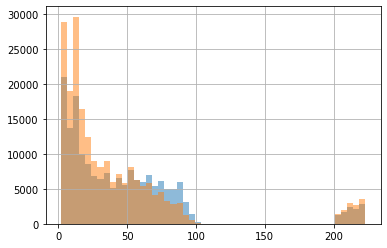

In [51]:
df.groupby(by='Sex').Age.hist(alpha=0.5, bins=50)##alpha how transparent the graph is #bins how many bars

In [52]:
#race column
df.Race

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
386877    NaN
386878    1.0
386879    3.0
386880    1.0
386881    1.0
386882    1.0
386883    NaN
386884    NaN
386885    3.0
386886    1.0
386887    1.0
386888    1.0
386889    1.0
386890    2.0
386891    1.0
386892    1.0
386893    1.0
386894    1.0
386895    1.0
386896    1.0
386897    1.0
386898    1.0
386899    1.0
386900    1.0
386901    2.0
386902    1.0
386903    2.0
386904    1.0
386905    1.0
386906    1.0
Name: Race, Length: 386886, dtype: float64

In [53]:
df['Race']= df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

In [54]:
df.head(2)

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21.0,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,NaN,1207.0,NaN,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AN...,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXIC...,S,46.0,77.6641
1,170100734,01/01/2017,71.0,Male,White,NaN,31.0,53.0,NaN,1.0,5.0,NaN,1807.0,NaN,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641


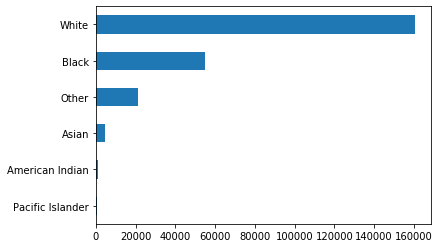

In [55]:
#bar chart of number of times each race shows up in our dataset
df.Race.value_counts().sort_values().plot(kind='barh') #sort_values untuk reverse

In [56]:
df.Race.value_counts(normalize=True) #untuk percentage pakai normalize=True

White               0.659991
Black               0.226718
Other               0.087121
Asian               0.019382
American Indian     0.005074
Pacific Islander    0.001715
Name: Race, dtype: float64

In [57]:
df.Sex.value_counts(normalize=True)

Male      0.539392
Female    0.460608
Name: Sex, dtype: float64

In [58]:
df.Sex.value_counts(dropna=False) #ini NAN MASIH 6 BUKAN 5 berarti non values gak terhapus

Male      208680
Female    178200
NaN            6
Name: Sex, dtype: int64

In [59]:
#Other Race

In [60]:
df.Other_Race.value_counts()

HISPANIC           17562
MULTI-RACIAL        2334
HISP                 815
SOMALI               449
NS                   312
UNKN                 140
NEPALI                51
BIRACIAL              44
MULTIRACIAL           34
MULTI RACIAL          24
ARAB                  17
NON HISPANIC          15
MEXICAN               14
PUERTO RICAN          13
DO NOT KNOW           13
DECLINE               12
`                     11
UNK                   10
SPANISH                8
HISPAINC               8
DECLINED               7
HISPANCI               6
MANDARIN               6
HISAPNIC               6
FULANI                 5
NOT STATED             4
HISPAINIC              4
N/S                    4
LAO                    4
TURKISH                4
                   ...  
1HISPANIC              1
URDU                   1
BIRCACIAL              1
NG                     1
NON-HISPANIC           1
HISPANIC1              1
ORIENTAL               1
OTHER RACE UK          1
HISPANI                1


In [76]:
import numpy as np
df.Other_Race.replace("NS",np.nan)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
386877         NaN
386878         NaN
386879    HISPANIC
386880         NaN
386881         NaN
386882         NaN
386883         NaN
386884         NaN
386885    HISPANIC
386886         NaN
386887         NaN
386888         NaN
386889         NaN
386890         NaN
386891         NaN
386892         NaN
386893         NaN
386894         NaN
386895         NaN
386896         NaN
386897         NaN
386898      

In [80]:
df.Other_Race.replace("NS","UNKN", None)


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
386877         NaN
386878         NaN
386879    HISPANIC
386880         NaN
386881         NaN
386882         NaN
386883         NaN
386884         NaN
386885    HISPANIC
386886         NaN
386887         NaN
386888         NaN
386889         NaN
386890         NaN
386891         NaN
386892         NaN
386893         NaN
386894         NaN
386895         NaN
386896         NaN
386897         NaN
386898      

In [81]:
df.Other_Race.value_counts().head(20)

HISPANIC        17562
MULTI-RACIAL     2334
HISP              815
SOMALI            449
NS                312
UNKN              140
NEPALI             51
BIRACIAL           44
MULTIRACIAL        34
MULTI RACIAL       24
ARAB               17
NON HISPANIC       15
MEXICAN            14
PUERTO RICAN       13
DO NOT KNOW        13
DECLINE            12
`                  11
UNK                10
SPANISH             8
HISPAINC            8
Name: Other_Race, dtype: int64

In [78]:
df[df.Other_Race ==['HISPANIC']]

ValueError: Lengths must match to compare

In [65]:
df[df.Other_Race.str.contains("^HISP", na=False)].Other_Race.value_counts()
#^ means the beginning of the sentences

HISPANIC      17562
HISP            815
HISPAINC          8
HISPANCI          6
HISPAINIC         4
HISPANIC.         2
HISPANICE         2
HISPANC           1
HISPANICX         1
HISPOANIC         1
HISPANI           1
HISPANIC1         1
HISPANINC         1
HISPANIC10        1
HISPAIN           1
Name: Other_Race, dtype: int64

In [74]:
#replace exact values
#REPLACE ANYTHING THAT STARTS WITH ^HISP

df.Other_Race.str.replace("^HISP.*","HISPANIC")
df.Other_Race.value_counts()

HISPANIC           17562
MULTI-RACIAL        2334
HISP                 815
SOMALI               449
NS                   312
UNKN                 140
NEPALI                51
BIRACIAL              44
MULTIRACIAL           34
MULTI RACIAL          24
ARAB                  17
NON HISPANIC          15
MEXICAN               14
PUERTO RICAN          13
DO NOT KNOW           13
DECLINE               12
`                     11
UNK                   10
SPANISH                8
HISPAINC               8
DECLINED               7
HISPANCI               6
MANDARIN               6
HISAPNIC               6
FULANI                 5
NOT STATED             4
HISPAINIC              4
N/S                    4
LAO                    4
TURKISH                4
                   ...  
1HISPANIC              1
URDU                   1
BIRCACIAL              1
NG                     1
NON-HISPANIC           1
HISPANIC1              1
ORIENTAL               1
OTHER RACE UK          1
HISPANI                1
